<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: ylabel='total_bill'>

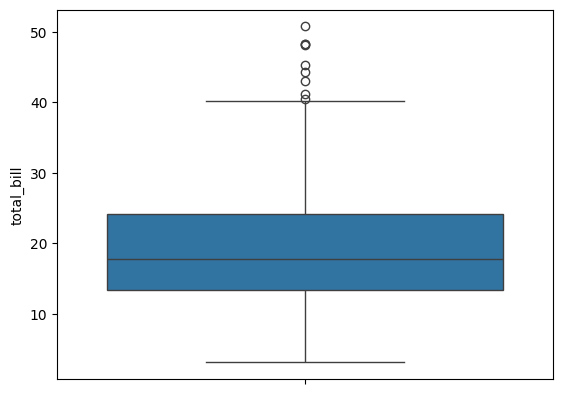

In [5]:
sns.boxplot(y='total_bill',data=df)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df['sex'].mode()

,sex
0,Male


In [8]:
# we will get mean and median for numerical column and by using df.describe we will get those details

<Axes: xlabel='total_bill', ylabel='Count'>

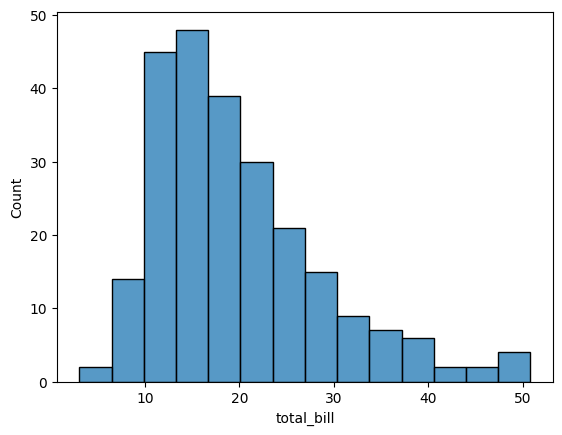

In [9]:
sns.histplot(x='total_bill',data=df)

<Axes: xlabel='total_bill'>

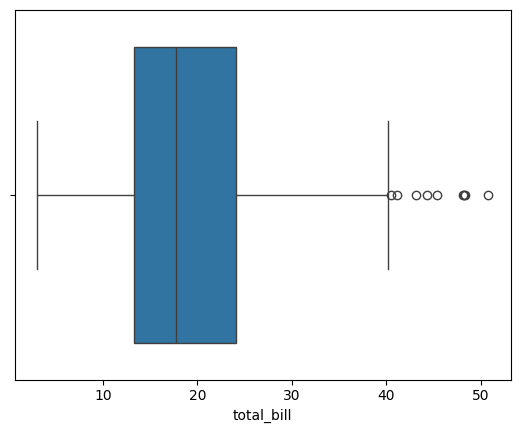

In [10]:
sns.boxplot(x='total_bill',data=df)

In [11]:
df['total_bill'].skew()

1.1332130376158205

In [12]:
from scipy.stats import zscore

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df['zscore_total_bill']=zscore(df['total_bill'])

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [16]:
df['zscore_total_bill']>3

,zscore_total_bill
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [17]:
df[(df['zscore_total_bill']>3)| (df['zscore_total_bill']<-3)]

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


<Axes: xlabel='zscore_total_bill', ylabel='Count'>

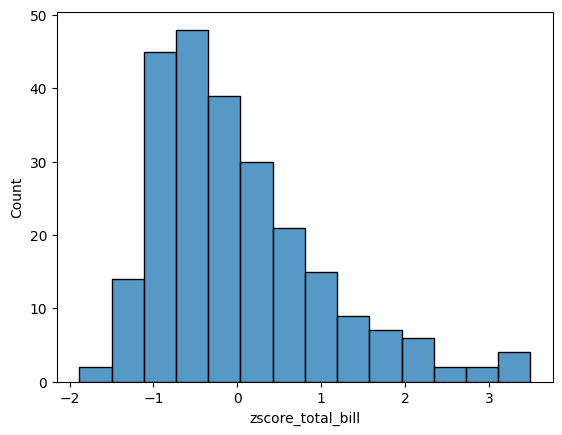

In [18]:
sns.histplot(x='zscore_total_bill',data=df)

<Axes: xlabel='zscore_total_bill'>

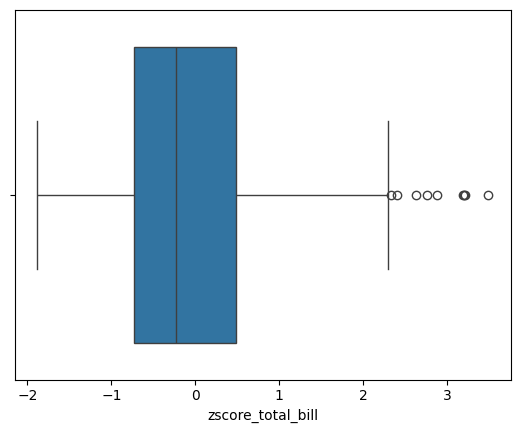

In [19]:
sns.boxplot(x='zscore_total_bill',data=df)

In [20]:
df[(df['zscore_total_bill']>3)| (df['zscore_total_bill']<-3)]['total_bill']

,total_bill
59,48.27
156,48.17
170,50.81
212,48.33


In [21]:
# to find correlation b/w columns we will use corr function

In [22]:
# df.corr()

In [23]:
print(df.dtypes)

total_bill            float64
tip                   float64
sex                  category
smoker               category
day                  category
time                 category
size                    int64
zscore_total_bill     float64
dtype: object


In [24]:
df.select_dtypes(include=['number'])

,total_bill,tip,size,zscore_total_bill
0,16.99,1.01,2,-0.314711
1,10.34,1.66,3,-1.063235
2,21.01,3.50,3,0.137780
3,23.68,3.31,2,0.438315
4,24.59,3.61,4,0.540745
...,...,...,...,...
239,29.03,5.92,3,1.040511
240,27.18,2.00,2,0.832275
241,22.67,2.00,2,0.324630
242,17.82,1.75,2,-0.221287


In [25]:
numerical_df=df.select_dtypes(include=['number'])

In [26]:
numerical_df.head()

,total_bill,tip,size,zscore_total_bill
0,16.99,1.01,2,-0.314711
1,10.34,1.66,3,-1.063235
2,21.01,3.50,3,0.137780
3,23.68,3.31,2,0.438315
4,24.59,3.61,4,0.540745


In [27]:
numerical_df.corr()

,total_bill,tip,size,zscore_total_bill
total_bill,1.000000,0.675734,0.598315,1.000000
tip,0.675734,1.000000,0.489299,0.675734
size,0.598315,0.489299,1.000000,0.598315
zscore_total_bill,1.000000,0.675734,0.598315,1.000000


In [28]:
# df.select_dtypes(include=['non-number'])

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:

le=LabelEncoder()

In [32]:
le.fit_transform(df['sex'])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [34]:
le.fit(df['sex'])

LabelEncoder()

In [35]:
le.transform(df['sex'])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [36]:
# le.fit_transform(df[['sex','smoker','day','time']])

In [37]:
df['sex1']=df['sex'].map({'Male':1,'Female':2})

In [38]:
df['sex1'].head()

,sex1
0,2
1,1
2,1
3,1
4,2


In [39]:
col=['sex','smoker','day','time']

for i in col:
  df[f'{i}1']=le.fit_transform(df[i])

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0


In [41]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [42]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [43]:
df['smoker'].shape

(244,)

In [44]:
df['smoker'].value_counts()/244

,count
smoker,
No,0.618852
Yes,0.381148


In [45]:
(df['smoker'].value_counts()/244)*100

,count
smoker,
No,61.885246
Yes,38.114754


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
en=OneHotEncoder()

In [48]:
encoded=en.fit_transform(df[['sex']])

In [49]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0


In [50]:
encoded.shape

(244, 2)

In [51]:
print(type(encoded))

<class 'scipy.sparse._csr.csr_matrix'>


In [52]:
encoded.dtype

dtype('float64')

In [53]:
encoded.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [54]:
end_df=pd.DataFrame(encoded.toarray(),columns=en.get_feature_names_out(['sex']))

In [55]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0


In [56]:
pd.concat([df,end_df],axis=1)

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511,1,0,1,0,0.0,1.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275,0,1,1,0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630,1,1,1,0,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287,1,0,1,0,0.0,1.0


In [57]:
df

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511,1,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630,1,1,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287,1,0,1,0


In [58]:
df=pd.concat([df,end_df],axis=1)

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0,1.0,0.0


In [60]:
df.drop(['sex'],axis=1)

,total_bill,tip,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,No,Sun,Dinner,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,No,Sun,Dinner,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,No,Sun,Dinner,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,No,Sun,Dinner,4,0.540745,0,0,2,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1.040511,1,0,1,0,0.0,1.0
240,27.18,2.00,Yes,Sat,Dinner,2,0.832275,0,1,1,0,1.0,0.0
241,22.67,2.00,Yes,Sat,Dinner,2,0.324630,1,1,1,0,0.0,1.0
242,17.82,1.75,No,Sat,Dinner,2,-0.221287,1,0,1,0,0.0,1.0


In [61]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0,0,2,0,1.0,0.0


In [62]:
df.drop(['sex'],axis=1,inplace=True)

In [63]:
df.head()

,total_bill,tip,smoker,day,time,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,No,Sun,Dinner,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,No,Sun,Dinner,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,No,Sun,Dinner,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,No,Sun,Dinner,4,0.540745,0,0,2,0,1.0,0.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   total_bill         244 non-null    float64 
 1   tip                244 non-null    float64 
 2   smoker             244 non-null    category
 3   day                244 non-null    category
 4   time               244 non-null    category
 5   size               244 non-null    int64   
 6   zscore_total_bill  244 non-null    float64 
 7   sex1               244 non-null    int64   
 8   smoker1            244 non-null    int64   
 9   day1               244 non-null    int64   
 10  time1              244 non-null    int64   
 11  sex_Female         244 non-null    float64 
 12  sex_Male           244 non-null    float64 
dtypes: category(3), float64(5), int64(5)
memory usage: 20.3 KB


In [65]:
categorical_columns=df.select_dtypes(include=['category','object']).columns

In [66]:
categorical_columns

Index(['smoker', 'day', 'time'], dtype='object')

In [67]:
df=df.drop(columns=categorical_columns)

In [68]:
df.head()

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,4,0.540745,0,0,2,0,1.0,0.0


In [69]:
df.drop(columns=['sex_Female','sex_Male'],axis=1)

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,2,-0.314711,0,0,2,0
1,10.34,1.66,3,-1.063235,1,0,2,0
2,21.01,3.50,3,0.137780,1,0,2,0
3,23.68,3.31,2,0.438315,1,0,2,0
4,24.59,3.61,4,0.540745,0,0,2,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.040511,1,0,1,0
240,27.18,2.00,2,0.832275,0,1,1,0
241,22.67,2.00,2,0.324630,1,1,1,0
242,17.82,1.75,2,-0.221287,1,0,1,0


In [70]:
df.head()

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,4,0.540745,0,0,2,0,1.0,0.0


In [71]:
df.drop(columns=['sex_Female','sex_Male'])

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,2,-0.314711,0,0,2,0
1,10.34,1.66,3,-1.063235,1,0,2,0
2,21.01,3.50,3,0.137780,1,0,2,0
3,23.68,3.31,2,0.438315,1,0,2,0
4,24.59,3.61,4,0.540745,0,0,2,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.040511,1,0,1,0
240,27.18,2.00,2,0.832275,0,1,1,0
241,22.67,2.00,2,0.324630,1,1,1,0
242,17.82,1.75,2,-0.221287,1,0,1,0


In [72]:
df.head()

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1,sex_Female,sex_Male
0,16.99,1.01,2,-0.314711,0,0,2,0,1.0,0.0
1,10.34,1.66,3,-1.063235,1,0,2,0,0.0,1.0
2,21.01,3.50,3,0.137780,1,0,2,0,0.0,1.0
3,23.68,3.31,2,0.438315,1,0,2,0,0.0,1.0
4,24.59,3.61,4,0.540745,0,0,2,0,1.0,0.0


In [73]:
df.drop(columns=['sex_Female','sex_Male'],axis=1,inplace=True)

In [74]:
df.head()

,total_bill,tip,size,zscore_total_bill,sex1,smoker1,day1,time1
0,16.99,1.01,2,-0.314711,0,0,2,0
1,10.34,1.66,3,-1.063235,1,0,2,0
2,21.01,3.50,3,0.137780,1,0,2,0
3,23.68,3.31,2,0.438315,1,0,2,0
4,24.59,3.61,4,0.540745,0,0,2,0


In [75]:
df.drop(columns=['zscore_total_bill'],inplace=True,axis=1)

In [76]:
df.head()

,total_bill,tip,size,sex1,smoker1,day1,time1
0,16.99,1.01,2,0,0,2,0
1,10.34,1.66,3,1,0,2,0
2,21.01,3.50,3,1,0,2,0
3,23.68,3.31,2,1,0,2,0
4,24.59,3.61,4,0,0,2,0


In [77]:
df.corr()

,total_bill,tip,size,sex1,smoker1,day1,time1
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,-0.043550,-0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,-0.011548,-0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.069510,-0.103411
sex1,0.144877,0.088862,0.086195,1.000000,0.002816,-0.078292,-0.205231
smoker1,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.282721,-0.054921
day1,-0.043550,-0.011548,0.069510,-0.078292,-0.282721,1.000000,0.638019
time1,-0.183118,-0.121629,-0.103411,-0.205231,-0.054921,0.638019,1.000000


In [78]:
df_corr=df[['total_bill','tip','size']].corr()

In [79]:
df_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


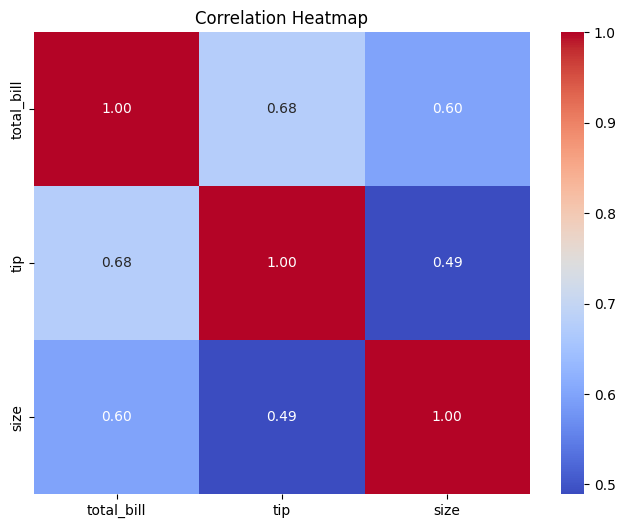

In [80]:
plt.figure(figsize=(8,6))

sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [81]:
# by above we can conlcude tip and total bill has .68 % relation

In [82]:
import numpy as np
from statsmodels.stats.weightstats import ztest

In [83]:
data=np.arange(120,180,2)

In [84]:
print(data)

[120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154
 156 158 160 162 164 166 168 170 172 174 176 178]


In [85]:
print(type(data))

<class 'numpy.ndarray'>


In [86]:
z,pvalue=ztest(data,value=156,alternative='two-sided')

In [87]:
print(z,'   ',pvalue)

-2.177598558933893     0.0294359369343824


In [88]:
thresh=0.05

In [89]:
if pvalue<thresh:
  print('reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean')
else:
  print('accept null hypothesis, means there is no significant diff b/w sample mean and pop mean')

reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean


In [90]:
df=pd.DataFrame(data)

In [91]:
df

,0
0,120
1,122
2,124
3,126
4,128
5,130
6,132
7,134
8,136
9,138


In [92]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [93]:
df.describe()

,0
count,30.000000
mean,149.000000
std,17.606817
min,120.000000
25%,134.500000
50%,149.000000
75%,163.500000
max,178.000000


In [94]:
# so means is 149 and median is 149

In [95]:
z,pvalue=ztest(data,value=154,alternative='two-sided')

In [96]:
print(z, pvalue)

-1.5554275420956378 0.11984427885822607


In [97]:
if pvalue<thresh:
  print('reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean')
else:
  print('accept null hypothesis, means there is no significant diff b/w sample mean and pop mean, means both are equal')

accept null hypothesis, means there is no significant diff b/w sample mean and pop mean, means both are equal


In [98]:
from scipy.stats import ttest_1samp

# t test is for sample < 30 and where we dont know standard deviation

In [99]:
sample=np.random.randint(1,10,20)

In [100]:
np.random.seed(42)

In [101]:
sample

array([7, 9, 8, 9, 7, 2, 3, 5, 8, 2, 7, 7, 7, 4, 6, 2, 9, 7, 3, 6])

In [102]:
t,pvalue=ttest_1samp(sample,50,alternative='two-sided')

In [103]:
print(t,pvalue)

-81.30354572468586 1.263724646951961e-25


In [104]:
if pvalue<thresh:
  print('reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean')
else:
  print('accept null hypothesis, means there is no significant diff b/w sample mean and pop mean, means both are equal')

reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean


In [105]:
pd.DataFrame(sample).describe()

,0
count,20.000000
mean,5.900000
std,2.425739
min,2.000000
25%,3.750000
50%,7.000000
75%,7.250000
max,9.000000


In [106]:
t,pvalue=ttest_1samp(sample,5,alternative='two-sided')

In [107]:
if pvalue<thresh:
  print('reject null hypothesis, so accept alternative hypothesis means significant diff b/w sample mean and pop mean')
else:
  print('accept null hypothesis, means there is no significant diff b/w sample mean and pop mean, means both are equal')

accept null hypothesis, means there is no significant diff b/w sample mean and pop mean, means both are equal


In [108]:
# paired test

In [109]:
before=np.random.randint(10,100,20)

In [110]:
np.random.seed(42)

In [111]:
before

array([61, 24, 81, 70, 30, 92, 96, 84, 84, 97, 33, 12, 31, 62, 11, 97, 39,
       47, 11, 73])

In [112]:
after=np.random.randint(10,200,20)

In [113]:
after

array([112, 189, 102,  24, 116,  81, 198,  30, 112, 131,  84,  97, 126,
       109, 113, 161, 140, 159,  62,  11])

In [114]:
from scipy.stats import ttest_rel

In [115]:
ttest,pvalue=ttest_rel(before,after,alternative='two-sided')

In [116]:
print(ttest,pvalue)

-3.828810879144776 0.0011327686787545395


In [117]:
alpha=0.05

In [118]:
if pvalue<alpha:
  print('reject null hypothesis: so there is significant changes in data')
else:
  print('failed to reject null hypothesis: pop mean is equal to sample mean')

reject null hypothesis: so there is significant changes in data


In [119]:
# ANOVA: if you want to compare 3 or more than 3 groups we will go by this

In [120]:
group={}
for i in range(1,4):
  group[f'group{i}']=np.random.randint(1,100,10)

In [121]:
group

{'group1': array([88, 30, 38,  2, 64, 60, 21, 33, 76, 58]),
 'group2': array([22, 89, 49, 91, 59, 42, 92, 60, 80, 15]),
 'group3': array([62, 62, 47, 62, 51, 55, 64,  3, 51,  7])}

In [122]:
print(pd.DataFrame(group))

   group1  group2  group3
0      88      22      62
1      30      89      62
2      38      49      47
3       2      91      62
4      64      59      51
5      60      42      55
6      21      92      64
7      33      60       3
8      76      80      51
9      58      15       7


In [123]:
for i in group:
  i=list(i)

In [124]:
print(group)

{'group1': array([88, 30, 38,  2, 64, 60, 21, 33, 76, 58]), 'group2': array([22, 89, 49, 91, 59, 42, 92, 60, 80, 15]), 'group3': array([62, 62, 47, 62, 51, 55, 64,  3, 51,  7])}


In [125]:
print(type(group['group1']))

<class 'numpy.ndarray'>


In [126]:
print((group['group1']))

[88 30 38  2 64 60 21 33 76 58]


In [127]:
group

{'group1': array([88, 30, 38,  2, 64, 60, 21, 33, 76, 58]),
 'group2': array([22, 89, 49, 91, 59, 42, 92, 60, 80, 15]),
 'group3': array([62, 62, 47, 62, 51, 55, 64,  3, 51,  7])}

In [128]:
df=pd.DataFrame(group)

In [129]:
df

,group1,group2,group3
0,88,22,62
1,30,89,62
2,38,49,47
3,2,91,62
4,64,59,51
5,60,42,55
6,21,92,64
7,33,60,3
8,76,80,51
9,58,15,7


In [130]:
df.describe()

,group1,group2,group3
count,10.000000,10.000000,10.000000
mean,47.000000,59.900000,46.400000
std,26.599916,28.167949,22.589083
min,2.000000,15.000000,3.000000
25%,30.750000,43.750000,48.000000
50%,48.000000,59.500000,53.000000
75%,63.000000,86.750000,62.000000
max,88.000000,92.000000,64.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   group1  10 non-null     int64
 1   group2  10 non-null     int64
 2   group3  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [132]:
df['group1']=df['group1'].astype('float64')

In [133]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group1  10 non-null     float64
 1   group2  10 non-null     int64  
 2   group3  10 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 372.0 bytes
None


In [134]:
df.select_dtypes(include=['number'])

,group1,group2,group3
0,88.0,22,62
1,30.0,89,62
2,38.0,49,47
3,2.0,91,62
4,64.0,59,51
5,60.0,42,55
6,21.0,92,64
7,33.0,60,3
8,76.0,80,51
9,58.0,15,7


In [135]:
df.select_dtypes(include=['category','object']).columns

Index([], dtype='object')

In [136]:
from scipy.stats import f_oneway

In [137]:
col1=group['group1']

In [138]:
col1

array([88, 30, 38,  2, 64, 60, 21, 33, 76, 58])

In [139]:
col1=list(col1)

In [140]:
col1

[88, 30, 38, 2, 64, 60, 21, 33, 76, 58]

In [141]:
col2=list(group['group2'])

In [142]:
col2

[22, 89, 49, 91, 59, 42, 92, 60, 80, 15]

In [143]:
[9, 90, 53, 2, 84, 92, 60, 71, 44, 8]



[9, 90, 53, 2, 84, 92, 60, 71, 44, 8]

In [144]:
col3=list(group['group3'])

In [145]:
col3

[62, 62, 47, 62, 51, 55, 64, 3, 51, 7]

In [146]:
fcal,pvalue=f_oneway(col1,col2,col3)

In [147]:
print(fcal,pvalue)

0.8676669631462939 0.4313119229437814


In [148]:
if pvalue<0.05:
  print('reject null hypothesis hence there is significant changes')
else:
  print('failed to reject null hypothesis hence there is no changes')

failed to reject null hypothesis hence there is no changes


In [149]:
col1=[20,30,40]

In [150]:
group

{'group1': array([88, 30, 38,  2, 64, 60, 21, 33, 76, 58]),
 'group2': array([22, 89, 49, 91, 59, 42, 92, 60, 80, 15]),
 'group3': array([62, 62, 47, 62, 51, 55, 64,  3, 51,  7])}

In [151]:
import numpy as np
from scipy.stats import f_oneway

# Original dictionary with groups
groups = {
    'group1': np.array([51,  7, 21, 73, 39, 18,  4, 89, 60, 14]),
    'group2': np.array([ 9, 90, 53,  2, 84, 92, 60, 71, 44,  8]),
    'group3': np.array([47, 35, 78, 81, 36, 50,  4,  2,  6, 54]),
}

# Extract data for ANOVA
group1 = groups['group1']
group2 = groups['group2']
group3 = groups['group3']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The result is significant at the 0.05 level; there is evidence to reject the null hypothesis.")
else:
    print("The result is not significant at the 0.05 level; there is insufficient evidence to reject the null hypothesis.")


F-statistic: 0.5768488080733776
P-value: 0.5684370176086315
The result is not significant at the 0.05 level; there is insufficient evidence to reject the null hypothesis.


In [152]:
from scipy.stats import ttest_rel

# t test is for sample < 30 and where we dont know standard deviation

In [154]:
# print(dir(scipy.stats))

In [155]:
# before and after

In [156]:
before=list(np.random.randint(10,100,20))
after=list(np.random.randint(10,100,20))

In [157]:
ttest,pvalue=ttest_rel(before,after,alternative='two-sided')
print(ttest,pvalue)

0.44020210171374363 0.6647577313231645


In [158]:
if pvalue<alpha:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')

failed to reject null hypothesis


In [159]:
group1=[9,11,13,9,8]
group2=[13,12,10,15,5]
group3=[14,13,17,7,9]

In [160]:
from scipy.stats import f_oneway
fcal,pvalue=f_oneway(group1,group2,group3)

In [161]:
print(fcal,pvalue)

0.43478260869565216 0.6572100954434325


In [162]:
if pvalue<alpha:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')

failed to reject null hypothesis


In [163]:
# chi-sqaure test

In [164]:
from scipy.stats import chisquare

In [165]:
observed=[18,36,21,9,6,12,36,45,36,21,6,9,9,3,3,3,9,9,6,3]

In [166]:
expected=[11.7,27,26.2,16.2,9.9,19.5,45,42,27,16.5,3.9,9,8.4,5.4,3.3,3.9,9,8.4,5.4,3.3]

In [167]:
len(expected)

20

In [168]:
len(observed)

20

In [170]:
import pandas as pd
from scipy.stats import chi2_contingency

In [171]:
# create a categorical contigency table

In [227]:
data=pd.DataFrame({'product A':[8000,15],'product B':[10,750]},index=['Male','Female'])

In [228]:
data

,product A,product B
Male,8000,10
Female,15,750


In [229]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [230]:
chi2,p,dof,expected=chi2_contingency(data)

In [231]:
print("Chi sqaure statistics: ",chi2)
print('p-value: ',p)
print('degree of fredom: ',dof)
print('expected frequencies: ',expected)

Chi sqaure statistics:  8450.481139391546
p-value:  0.0
degree of fredom:  1
expected frequencies:  [[7316.25641026  693.74358974]
 [ 698.74358974   66.25641026]]


In [232]:
if p<alpha:
  print('reject null hypothesis hence there is a relation b/w gender and product')
else:
  print('failed reject null hypothesis hence no relation b/w product and gender')

reject null hypothesis hence there is a relation b/w gender and product
